# 1. Instalación de librerias en python

In [2]:
!pip install pandas
!pip install pandas_datareader
!pip install datetime
!pip install matplotlib
!pip install scipy


     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 174kB 25.6MB/s 


# 2. Habilitando las librerias

In [0]:
import pandas as pd
import pandas_datareader.data as web   # Importacion de las libreias
from pandas_datareader import data
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

import numpy as np
from scipy import optimize

# 3. Lectura de los datos

In [0]:
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
#end = datetime.datetime(2016,12,31)

#microsoft = web.DataReader("MSFT", "yahoo", start, end)
#google = web.DataReader("GOOG", "yahoo", start, end)
#gsp = web.DataReader("^GSPC", "yahoo", start, end)

CAT = web.DataReader("CAT", "yahoo", start, end)
C = web.DataReader("C", "yahoo", start, end)
ATVI = web.DataReader("ATVI", "yahoo", start, end)
EPU = web.DataReader("EPU", "yahoo", start, end)
BAP = web.DataReader("BAP", "yahoo", start, end)
LTM = web.DataReader("LTM", "yahoo", start, end)

# Lectura del precio de las acciones de Apple desde Yahoo Finance!
stocks = pd.DataFrame({"CAT": CAT["Adj Close"],
                      "C": C["Adj Close"],
                      "BAP": BAP["Adj Close"],
                      "EPU": EPU["Adj Close"],
                      "LTM": LTM["Adj Close"],
                      "ATVI": ATVI["Adj Close"]})


In [5]:
stocks.head(9)

,CAT,C,BAP,EPU,LTM,ATVI
Date,,,,,,
2017-01-03,86.785957,56.812027,140.992477,30.881676,8.036446,35.941536
2017-01-04,86.398132,57.580894,143.000534,31.338699,8.272233,36.647812
2017-01-05,85.871826,56.577614,143.341019,31.730433,8.321356,37.216755
2017-01-06,85.908752,56.774513,143.786316,31.562546,8.213285,37.187328
2017-01-09,85.290115,56.465092,142.485428,31.637159,8.164164,36.981331
2017-01-10,86.638214,56.474464,144.056961,31.888990,8.360654,37.648373
2017-01-11,87.395370,56.221298,142.817200,31.637159,8.704511,38.452740
2017-01-12,86.785957,55.536823,142.598907,31.590525,9.028720,38.384071
2017-01-13,87.238396,55.911880,140.782913,31.805046,9.058193,38.207504


In [6]:
# Analisis del riesgo del portafolio de acciones (Analisis de correlacion)

stocks.corr()

,CAT,C,BAP,EPU,LTM,ATVI
CAT,1.000000,0.774204,0.792664,0.835909,0.339490,0.521115
C,0.774204,1.000000,0.561828,0.627491,0.345851,0.545615
BAP,0.792664,0.561828,1.000000,0.609295,-0.057658,0.119468
EPU,0.835909,0.627491,0.609295,1.000000,0.592518,0.502746
LTM,0.339490,0.345851,-0.057658,0.592518,1.000000,0.390175
ATVI,0.521115,0.545615,0.119468,0.502746,0.390175,1.000000


# 4. Calculo de Rentabilidad Logaritmo

In [7]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
# Rantabilides aplicado logritmo  y diferencias con el precio inmediato anterior
log_returns = np.log(stocks).diff()
log_returns.head()

,CAT,C,BAP,EPU,LTM,ATVI
Date,,,,,,
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,-0.004479,0.013443,0.014142,0.014691,0.028918,0.019460
2017-01-05,-0.006110,-0.017577,0.002378,0.012423,0.005921,0.015405
2017-01-06,0.000430,0.003474,0.003102,-0.005305,-0.013072,-0.000791
2017-01-09,-0.007227,-0.005465,-0.009089,0.002361,-0.005999,-0.005555


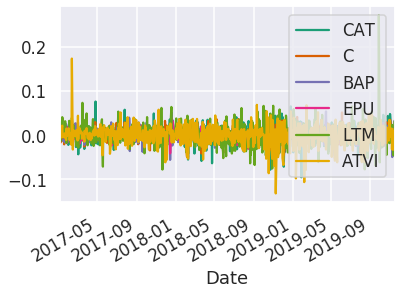

In [8]:
# Grafica de las rentabilidades
log_returns.plot(grid = True)

# 5. Optimizacion del Portafolio 

In [0]:
np.random.seed(100)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(6))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [10]:
print('Maximo Sharpe ratio: {}'.format(sharpe_arr.max()))

Maximo Sharpe ratio: 0.8169308419946024


In [0]:
#Tenemos los Pesos del Portafolio

In [12]:
print(all_weights [5451,:])
max_sr_ret= ret_arr[sharpe_arr.argmax()]
max_sr_vol= vol_arr[sharpe_arr.argmax()]

[0.32461557 0.07610132 0.3106864  0.0886815  0.13788927 0.06202594]


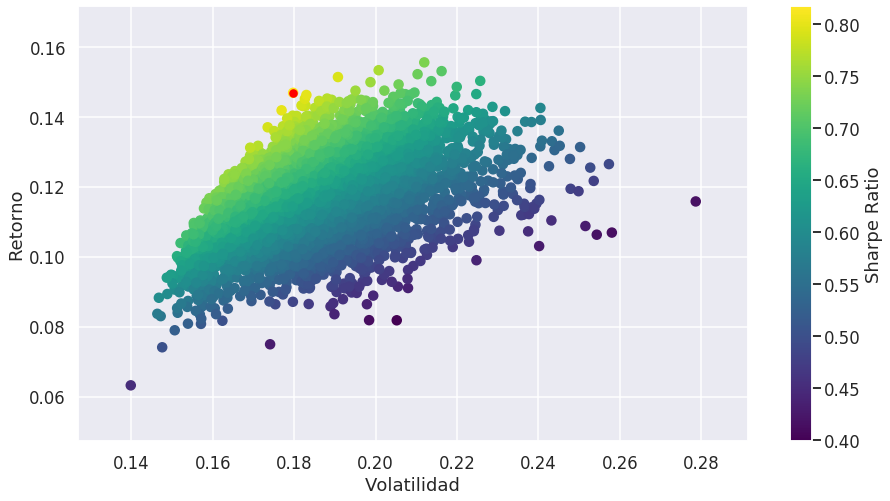

In [13]:
#Graficamos los diferentes retornos de los portafolios simulados
plt.figure(figsize=(15,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [0]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [0]:
cons= ({'type': 'eq', 'fun':check_sum})
bounds= ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess= [0.15,0.15,0.15,0.15,0.15,0.25]

In [16]:
opt_results= optimize.minimize(neg_sharpe, init_guess, method= 'SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -0.83133847319829
     jac: array([ 5.38676977e-06,  9.35049281e-02, -2.45064497e-04,  2.04408295e-01,
        1.28979817e-01,  1.58878416e-03])
 message: 'Optimization terminated successfully.'
    nfev: 41
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([3.55863907e-01, 5.81132364e-17, 5.59705975e-01, 0.00000000e+00,
       4.18637564e-17, 8.44301177e-02])


In [17]:
#Obtenemos los pesos del portafolio
get_ret_vol_sr(opt_results.x)

array([0.15389163, 0.18511309, 0.83133847])

In [0]:
frontier_y= np.linspace(0,0.3,200)

In [0]:
def minimize_volatility(weights):
    return get_ret_vol_sr (weights)[1]

In [0]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = optimize.minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

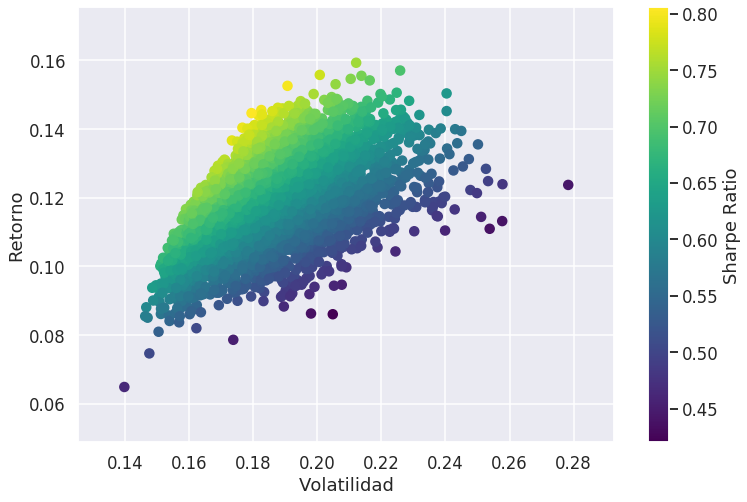

In [0]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidad')
plt.ylabel('Retorno')
#plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()